# BolognaWiFi

## Analisi delle aree di copertura di BolognaWiFi e degli hotspot.


In [90]:
import multiprocessing as mp

from time import strftime,localtime
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from shapely import wkt

%matplotlib inline
ox.config(log_console=True)

In [91]:
# configuring notebook variables
place = "Bologna, Emilia-Romagna, Italia"
token = 'utuMOzHGIV'
aree_url = 'https://rache.labs.it/ftbo/map/api/?report=maps&meta=%7B%22areagroup%22%3A%20%22poi_bo_2%22%2C%20%22mapset%22%3A%20%22ftbo%22%7D&page_id=maps_poi_bo&username=open_data&lomatoken=' + token
aree_df = gpd.read_file(aree_url, crs="EPSG:4326")
aree_df.set_index("id", inplace = True)
aree_df['area_centroid'] = aree_df['geometry'].centroid
aree_df.head()


<ipython-input-91-f77e56771c26>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aree_df['area_centroid'] = aree_df['geometry'].centroid


,name,geometry,area_centroid
id,,,
biblioteca_natalia_ginzburg,Biblioteca Natalia Ginzburg,"POLYGON ((11.39178 44.47429, 11.39165 44.47413...",POINT (11.39170 44.47412)
polizia_municipale_lombardia,Polizia Municipale Via Lombardia,"POLYGON ((11.38092 44.47538, 11.38021 44.47505...",POINT (11.38073 44.47504)
centro_studi_cabral,Centro Studi Amilcar Cabral,"POLYGON ((11.33939 44.48460, 11.33922 44.48411...",POINT (11.33956 44.48426)
giardino_lavinia_fontana,Giardino Lavinia Fontana,"POLYGON ((11.35579 44.48864, 11.35624 44.48849...",POINT (11.35565 44.48810)
pubblica_assistenza,Pubblica Assistenza Citta' di Bologna,"POLYGON ((11.38324 44.49704, 11.38300 44.49657...",POINT (11.38365 44.49688)


<AxesSubplot:>

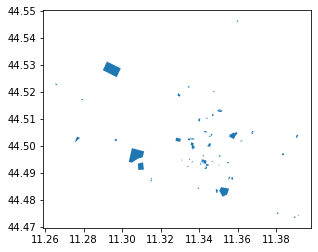

In [92]:
aree_df.plot()
#plt.show()


<ipython-input-93-2c4a63e754a9>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_df = aree_df['geometry'].centroid


<AxesSubplot:>

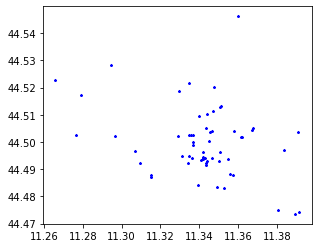

In [93]:
centroid_df = aree_df['geometry'].centroid
centroid_df.plot(marker='*', color='b', markersize=5)

Totale hotspot: 224
Totale hotspot attivi: 210


<AxesSubplot:>

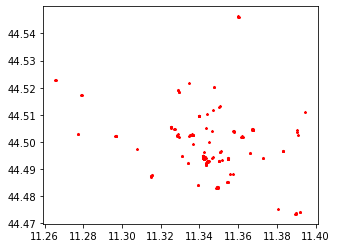

In [94]:
hotspot_url = 'http://wifilocation.comune.bologna.it/getfeatures/'
hotspot_df = gpd.read_file(hotspot_url)
hotspot_df.set_index("hostname", inplace = True)
hotspot_df.set_geometry("geometry")
print('Totale hotspot: ' + str(hotspot_df.shape[0]))
hotspot_df = hotspot_df[hotspot_df.onlinestatus == "OK"]
print('Totale hotspot attivi: ' + str(hotspot_df.shape[0]))
hotspot_df.plot(marker='*', color='r', markersize=5)


<Figure size 432x288 with 0 Axes>

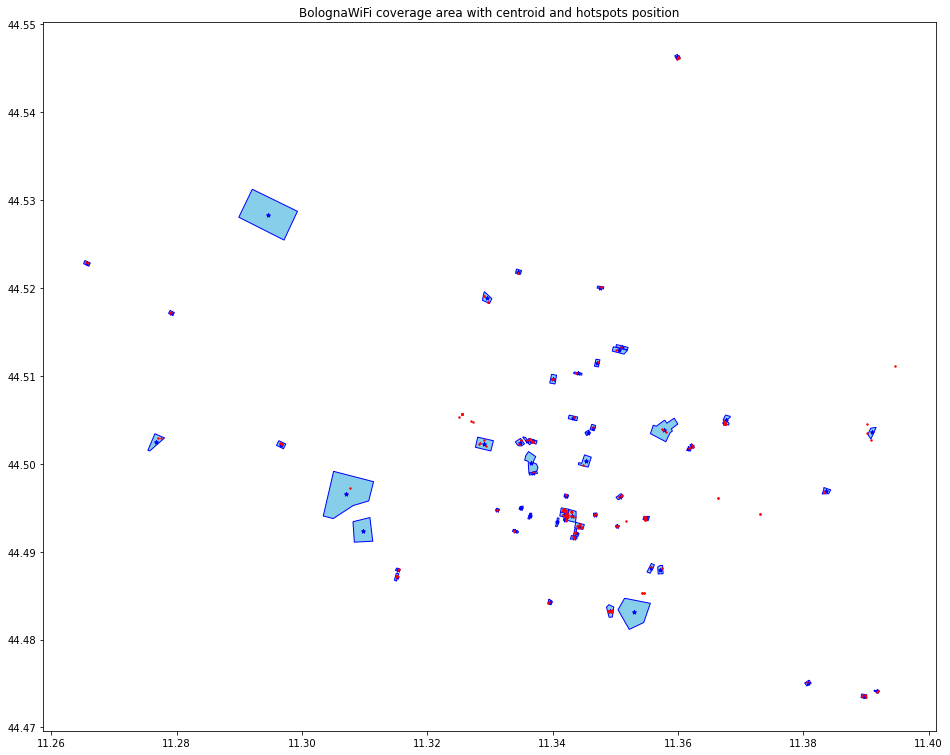

In [95]:
hotspot_df = hotspot_df.to_crs(aree_df.crs)
aree = aree_df.plot(ax=ax, facecolor="none", edgecolor='b')
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('BolognaWiFi coverage area with centroid and hotspots position')
aree_df.plot(ax=ax, facecolor="skyblue", edgecolor='b')
centroid_df.plot(ax=ax, marker='*', color='b', markersize=15)
hotspot_df.plot(ax=ax, marker='o', color='r', markersize=2)
plt.show()


In [133]:
hotspots = gpd.sjoin(hotspot_df, aree_df, how="left", op='intersects')
hotspots

,clientcount,apdescription,uuid,onlinestatus,geometry,index_right,name,area_centroid
hostname,,,,,,,,
ap-lepida-8agosto-1,12,P.zza 8 agosto,f622cf91c48e4b7a865454aba313daad,OK,POINT (11.34479 44.49991),piazza_8_agosto,Piazza 8 Agosto,POINT (11.34528 44.50028)
ap-lepida-aldrovandi-1,2,Piazza Aldrovandi,e068e341d4744052a90c7df9d8216230,OK,POINT (11.35175 44.49353),NaN,NaN,None
ap-lepida-mercatoalbani-1,9,Mercato Albani,27229e93de2240f1b4557c39c1f1371c,OK,POINT (11.34378 44.51032),mercato_via_albani,Mercato di Via Albani,POINT (11.34403 44.51027)
ap-lepida-unita-1,13,P.zza Unità zona 1,0f5f3d8afdcb44f5b2c4426a2ac86404,OK,POINT (11.34719 44.51161),piazza_unita,Piazza Dell'Unita',POINT (11.34710 44.51146)
ap-lepida-verdi-1,7,Piazza Verdi,e7886e8dc04f4ccbb7b07c043fa1ab40,OK,POINT (11.35052 44.49626),piazza_verdi,Piazza Verdi,POINT (11.35068 44.49624)
...,...,...,...,...,...,...,...,...
Q.SVitale-D-Cortile,0,Quartiere Santo Stefano,ee13873be0ed4659b23ca21e8259c1fc,OK,POINT (11.35471 44.49363),biblioteca_ruffilli,Biblioteca Ruffilli,POINT (11.35493 44.49379)
ReEenzo-e-Extrabo1,7,ExtraBo,5ebe207984e54bfdac3f6911be0601a7,OK,POINT (11.34311 44.49454),piazza_maggiore_podesta,Piazza Maggiore / Podesta',POINT (11.34308 44.49405)
ReEenzo-e-Extrabo2,0,ExtraBo,1894edd2a3d04392a3cbd257e582d032,OK,POINT (11.34299 44.49461),piazza_maggiore_podesta,Piazza Maggiore / Podesta',POINT (11.34308 44.49405)


In [135]:
#save the wifi coverage areas & hostspots data
hotspots.to_csv('./bo_data/coverage-areas_hotspots.csv', index = True, header=True)

In [136]:
hotspots_null = hotspots[pd.isna(hotspots.index_right)]
print('Totale hotspot non inclusi in aree: ' + str(hotspots_null.shape[0]))
hotspots_null

Totale hotspot non inclusi in aree: 22


,clientcount,apdescription,uuid,onlinestatus,geometry,index_right,name,area_centroid
hostname,,,,,,,,
ap-lepida-aldrovandi-1,2,Piazza Aldrovandi,e068e341d4744052a90c7df9d8216230,OK,POINT (11.35175 44.49353),NaN,NaN,None
Biblioteca Spina,5,Biblioteca Spina,de3ff28bacd44278934026ba510d45fc,OK,POINT (11.39465 44.51117),NaN,NaN,None
cwmtik-libia-1,1,Atelier dei Saperi 1,3126586fa5ee425194b315035b075251,OK,POINT (11.36638 44.49611),NaN,NaN,None
cwmtik-libia-2,0,Atelier dei Saperi 2,2dc2c6ce86dc4c229bb3188ebd992e46,OK,POINT (11.36638 44.49611),NaN,NaN,None
Dumbo-A-Palco,0,Dumbo capannone 4,b201859ec274417cb1a3effb80355c89,OK,POINT (11.32552 44.50567),NaN,NaN,None
Dumbo-B-PianoTerra,0,Dumbo palazzina,a332ddef54784fc3806267cddff450c2,OK,POINT (11.32722 44.50472),NaN,NaN,None
Dumbo-B-SecondoPiano,3,Dumbo palazzina,0046fe6dae3c4834a5462cbb364db714,OK,POINT (11.32693 44.50483),NaN,NaN,None
Dumbo-C-Centrale,0,Dumbo Capanone 3,b1b429e59fce4b8996a04ff5b7b9766f,OK,POINT (11.32506 44.50528),NaN,NaN,None
Dumbo-D-Capannone1,0,Dumbo Capannone1,5087ac7d28de4adcb109f2c3e478d249,OK,POINT (11.32552 44.50567),NaN,NaN,None


In [137]:
aree = gpd.sjoin(aree_df, hotspot_df, how="left", op='intersects')
aree_null = aree[pd.isna(aree.index_right)]
print('Totale aree senza hotspots: ' + str(aree_null.shape[0]))
aree_null

Totale aree senza hotspots: 9


,name,geometry,area_centroid,index_right,clientcount,apdescription,uuid,onlinestatus
id,,,,,,,,
polizia_minucipale,Polizia Municipale,"POLYGON ((11.39074 44.50405, 11.39030 44.50332...",POINT (11.39089 44.50357),NaN,NaN,NaN,NaN,NaN
piazza_galileo_galilei,Piazza Galileo Galilei,"POLYGON ((11.34067 44.49358, 11.34046 44.49287...",POINT (11.34074 44.49334),NaN,NaN,NaN,NaN,NaN
piazza_malpighi,Piazza Malpighi,"POLYGON ((11.33636 44.49440, 11.33604 44.49376...",POINT (11.33635 44.49405),NaN,NaN,NaN,NaN,NaN
cineteca,Cineteca,"POLYGON ((11.33622 44.49890, 11.33632 44.49871...",POINT (11.33690 44.49892),NaN,NaN,NaN,NaN,NaN
stadio,Stadio,"POLYGON ((11.30813 44.49341, 11.30834 44.49108...",POINT (11.30968 44.49238),NaN,NaN,NaN,NaN,NaN
piazza_san_francesco,Piazza San Francesco,"POLYGON ((11.33461 44.49484, 11.33513 44.49472...",POINT (11.33497 44.49496),NaN,NaN,NaN,NaN,NaN
giardini_margherita,Giardini Margherita,"POLYGON ((11.35146 44.48470, 11.35042 44.48339...",POINT (11.35292 44.48310),NaN,NaN,NaN,NaN,NaN
aeroporto,Aeroporto,"POLYGON ((11.29206 44.53124, 11.28991 44.52806...",POINT (11.29460 44.52836),NaN,NaN,NaN,NaN,NaN
velostazione,Velostazione,"POLYGON ((11.34514 44.50356, 11.34574 44.50382...",POINT (11.34557 44.50352),NaN,NaN,NaN,NaN,NaN


<ipython-input-138-2057ca8f9646>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_null = aree_null['geometry'].centroid


<Figure size 432x288 with 0 Axes>

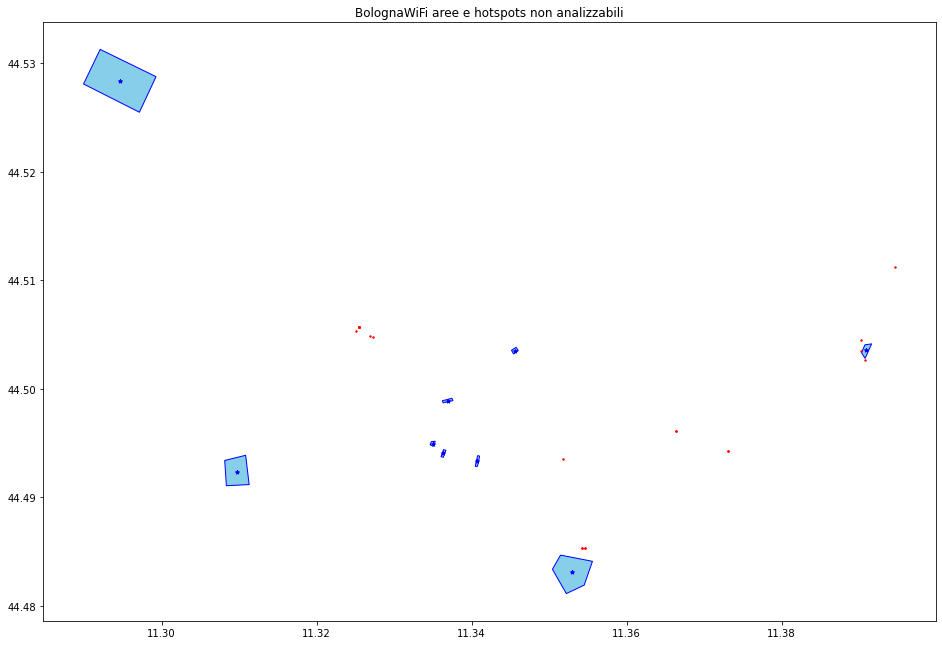

In [138]:
centroid_null = aree_null['geometry'].centroid
a = aree_null.plot(ax=ax, facecolor="none", edgecolor='b')
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('BolognaWiFi aree e hotspots non analizzabili')
aree_null.plot(ax=ax, facecolor="skyblue", edgecolor='b')
centroid_null.plot(ax=ax, marker='*', color='b', markersize=15)
hotspots_null.plot(ax=ax, marker='o', color='r', markersize=2)
plt.show()

In [132]:
#map = folium.Map(location = [44.51,11.33], tiles='OpenStreetMap' , zoom_start = 13)
#map